In [18]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import os

# 브라우저 옵션 설정 (필요에 따라 headless 옵션 사용 가능)
options = webdriver.ChromeOptions()
options.add_argument('--start-maximized')
options.add_argument('--headless')

download_dir = os.path.abspath("/Users/wisewoo/Hack/")
os.makedirs(download_dir, exist_ok=True)

prefs = {
    "download.default_directory": download_dir,
    "download.prompt_for_download": False,
    "download.directory_upgrade": True,
    "safebrowsing.enabled": True
}
options.add_experimental_option("prefs", prefs)

driver = webdriver.Chrome(options=options)
wait = WebDriverWait(driver, 10)

url = 'https://www.i-sh.co.kr/main/lay2/program/S1T297C4476/www/brd/m_247/list.do?multi_itm_seq=2'  # 여기에 정확한 URL을 넣어줘
driver.get(url)

# 공지 유형 중에서 모집 공고만 보는거 필터 버튼
radio1 = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.ID, 'annType1Now'))
)
radio1.click()
print("Click Radio 1")

# 공고중만 필터 보는 라디오 버튼 
radio2 = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.ID, 'annType2Now'))
)
radio2.click()

# 조회 버튼 클릭
search_button = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.CSS_SELECTOR, 'a.btn.btnGreen'))
)

search_button.click()

WebDriverWait(driver, 10).until(
    EC.presence_of_element_located((By.CSS_SELECTOR, '#listTb > table > tbody > tr'))
)

time.sleep(5) # 랜더링 시간 애매한데 

rows = driver.find_elements(By.CSS_SELECTOR, '#listTb > table > tbody > tr')
results = []

for i in range(len(rows)):
    rows = wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, '#listTb > table > tbody > tr')))
    a_tag = rows[i].find_element(By.CSS_SELECTOR, 'td.txtL > a')
    a_tag.click()
    time.sleep(5)
    
    tbody = driver.find_element(By.CSS_SELECTOR, "#container > div.contents > div.detailTable.gs0401Table.firgs0401Table > table > tbody")
    trs = tbody.find_elements(By.TAG_NAME, "tr")
    tr_num = len(trs)
    
    for tr_i in range(2, tr_num - 1):
        selector = f"#container > div.contents > div.detailTable.gs0401Table.firgs0401Table > table > tbody > tr:nth-child({tr_i}) > td.gs0401td > a"
        
        try:
            link_elem = driver.find_element(By.CSS_SELECTOR, selector)
            link_text = link_elem.text.strip()
    
            if "공고" in link_text and ".pdf" in link_text:
                link_elem.click()
                print(f"Download : {link_text}")
                time.sleep(4)

        except:
            pass

    driver.back()
    time.sleep(3)

driver.quit()

Click Radio 1
Download : 2025년 은평구 신혼부부 맞춤형 공공주택 입주자 모집 공고문.pdf
Download : [공고문] 2025년 상반기 신혼·신생아 매입임대주택Ⅰ 입주대기자 모집공고_최종.pdf
Download : [공고문] 2025년 상반기 신혼·신생아 매입임대주택Ⅱ 입주대기자 모집공고_최종.pdf


공고에 올라온 정보들은 너무 많다. 이럴 때는 "*공고*.pdf" 파일들만 가져와서 전송하도록 한다.

추가로 같은 공고에 지원 자격이 다른 2개의 pdf가 있는 경우도 있다. 이럴 때는 2개를 다른 공고로 보고 각각 입력한다.

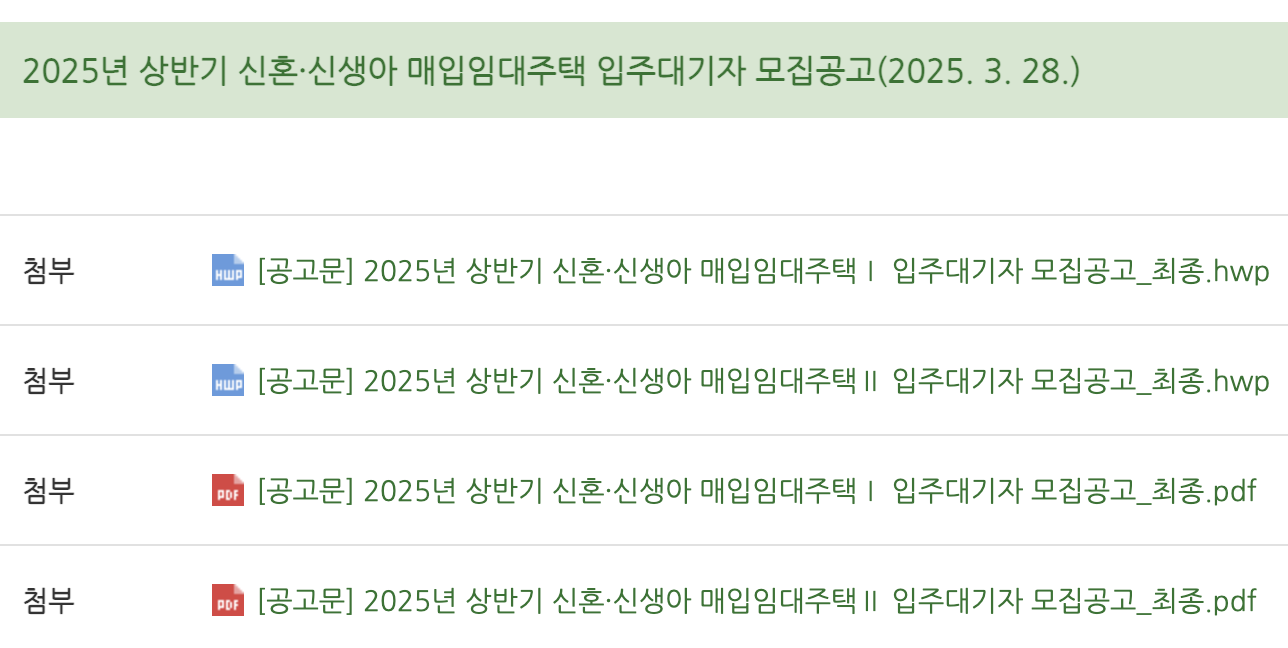

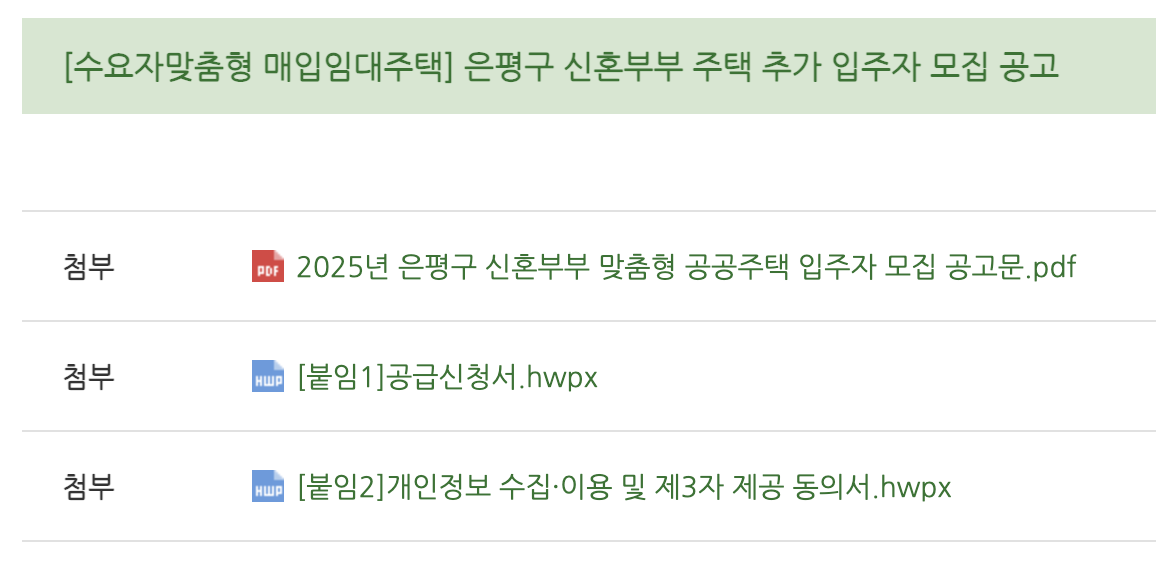

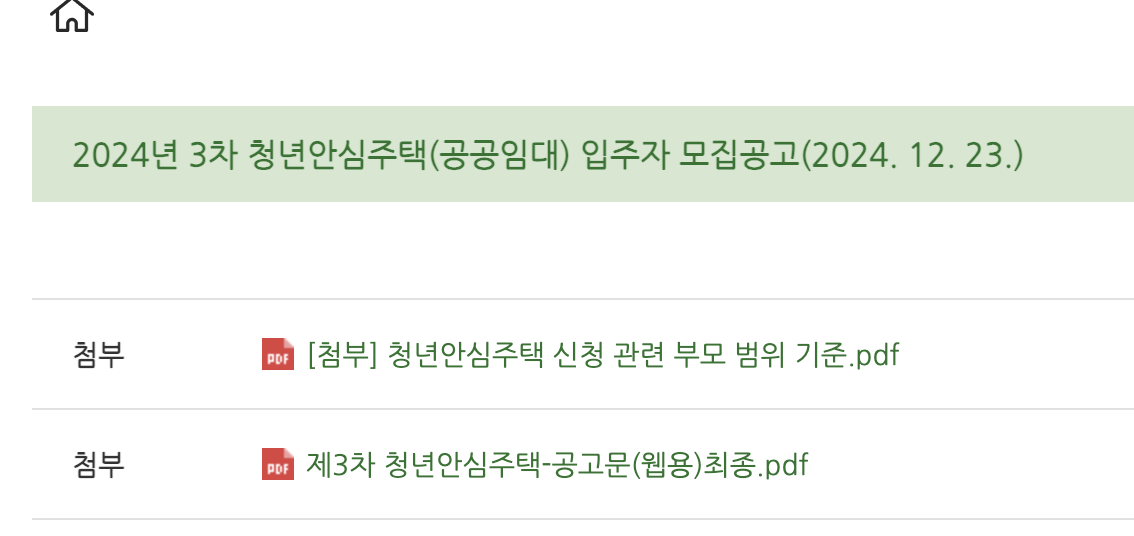

# LH

In [68]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select, WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import datetime
import os
import time

download_dir = os.path.abspath("/Users/wisewoo/Hack/")
os.makedirs(download_dir, exist_ok=True)

options = webdriver.ChromeOptions()
options.add_argument('--start-maximized')
options.add_argument('--headless')

prefs = {
    "download.default_directory": download_dir,
    "download.prompt_for_download": False,
    "download.directory_upgrade": True,
    "safebrowsing.enabled": True
}
options.add_experimental_option("prefs", prefs)

driver = webdriver.Chrome(options=options)
wait = WebDriverWait(driver, 10)

# 랜딩 페이지 캘린더 페이지로 이동
driver.get("https://apply.lh.or.kr/lhapply/apply/sc/list.do?mi=1312")
time.sleep(7)

# 임대만 선택
select_cal = Select(driver.find_element(By.ID, "calSrchType"))
select_cal.select_by_value("01")  # 임대주택
time.sleep(1)

# 접수 하는것만 선택
select_recv = Select(driver.find_element(By.ID, "srchPanSs"))
select_recv.select_by_visible_text("접수")
time.sleep(1)

# 검색 버튼 클릭
driver.find_element(By.ID, "btnSah").click()
time.sleep(5)

# 오늘 날짜 기반 셀렉터 생성
today = datetime.datetime.today()
year = str(today.year)[2:]
month = f"{today.month:02d}"
day = f"{today.day:02d}"
selector_prefix = f"#\\32 0{year}{month}{day}"
calendar_selector = f"{selector_prefix} > a.btn_more.hash"

# 오늘 날짜의 버튼 클릭
wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, calendar_selector))).click()
time.sleep(2)

# 팝업 안에서 공고 리스트 긁기
popup = wait.until(EC.presence_of_element_located((By.ID, 'popSchleMore')))
notice_items = popup.find_elements(By.CSS_SELECTOR, "li")

for idx in range(1, len(notice_items)+1):
    try:
        a_tag = notice_items[idx].find_element(By.CSS_SELECTOR, "dl > dt > a")
        href = a_tag.get_attribute("href")

        # 직접 링크 클릭이 아니라, 링크를 새로 여는 방식으로 처리 (팝업 클릭 안 함)
        driver.execute_script("window.open(arguments[0]);", href)
        driver.switch_to.window(driver.window_handles[-1])

        # 페이지 로딩 대기
        time.sleep(6)

        # 공고 pdf 다운로드: "공고" + ".pdf" 포함된 a 태그 클릭
        download_links = driver.find_elements(By.CSS_SELECTOR, "a")
        for link in download_links:
            text = link.text.strip()
            if "공고" in text and ".pdf" in text:
                link.click()
                time.sleep(2)

        driver.close()
        driver.switch_to.window(driver.window_handles[0])
        time.sleep(1)

    except:
        pass

🔍 팝업 내 공고 수: 60
📄 공고 1: https://apply.lh.or.kr/lhapply/apply/wt/wrtanc/selectWrtancInfo.do?panId=2015122300017797&ccrCnntSysDsCd=03&uppAisTpCd=13&aisTpCd=26&mi=1026
📥 다운로드: 2.25년1차신혼·신생아매입임대Ⅱ(전세형)예비입주자모집공고문(경기북부).pdf
📄 공고 2: https://apply.lh.or.kr/lhapply/apply/wt/wrtanc/selectWrtancInfo.do?panId=2015122300017783&ccrCnntSysDsCd=03&uppAisTpCd=13&aisTpCd=26&mi=1026
📥 다운로드: [충북지역본부]신혼·신생아 매입임대주택Ⅰ 예비입주자 모집공고(250327).pdf
📄 공고 3: https://apply.lh.or.kr/lhapply/apply/wt/wrtanc/selectWrtancInfo.do?panId=2015122300017795&ccrCnntSysDsCd=03&uppAisTpCd=13&aisTpCd=26&mi=1026
📥 다운로드: 2.25년1차신혼·신생아매입임대Ⅰ예비입주자모집공고문(경기북부).pdf
📄 공고 4: https://apply.lh.or.kr/lhapply/apply/wt/wrtanc/selectWrtancInfo.do?panId=2015122300017766&ccrCnntSysDsCd=03&uppAisTpCd=13&aisTpCd=26&mi=1026
📥 다운로드: 2.25년1차청년매입임대예비입주자모집공고문(경기북부).pdf
📄 공고 5: https://apply.lh.or.kr/lhapply/apply/wt/wrtanc/selectWrtancInfo.do?panId=2015122300017776&ccrCnntSysDsCd=03&uppAisTpCd=13&aisTpCd=26&mi=1026
